In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
df_user = pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/DataSS/Rides/ride_demand_ss_1week.csv')
df_food= pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/DataSS/Deliveries/delivery_demand_ss_1week.csv')

In [3]:
df_user.head()

,Unnamed: 0,ID_viaje,Estado cerrado,Duracion,Id de estacion de inicio,Fecha de inicio,Nombre de estacion de inicio,Fecha de fin,Id de estacion de fin de viaje,Nombre de estacion de fin de viaje,...,Moto identificador publico,Modelo de bicicleta,Nombre de producto,start_station_lat,start_station_lon,end_station_lat,end_station_lon,starttime,withinC,withinCend
0,237518,1164530,NORMAL,489,31,2022-09-19 06:00:00,31 - BARCELONA,19/09/2022 6:08,19.0,19 - FRANTZIA PASEALEKUA,...,748.0,EFIT,Dbizi Ordinario,43.312025,-1.972148,43.317856,-1.977321,2022-09-19 06:00:00,True,True
1,237517,1164531,NORMAL,480,21,2022-09-19 06:03:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:11,9.0,09 - EASO,...,77.0,FIT,Ordinario,43.316951,-1.971451,43.313289,-1.981765,2022-09-19 06:03:00,True,True
2,237516,1164532,NORMAL,274,16,2022-09-19 06:04:00,16 - ATARIZAR,19/09/2022 6:08,52.0,23 - GABRIEL CELAYA PLAZA,...,801.0,EFIT,Ordinario,43.321269,-1.959826,43.316630,-1.953499,2022-09-19 06:04:00,True,True
3,237515,1164533,NORMAL,101,21,2022-09-19 06:05:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:06,20.0,20 - TABAKALERA,...,746.0,EFIT,Dbizi Ocasional,43.316951,-1.971451,43.317038,-1.975053,2022-09-19 06:05:00,True,True
4,237514,1164534,NORMAL,306,21,2022-09-19 06:08:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:13,32.0,32 - URBIA,...,189.0,FIT,Ordinario,43.316951,-1.971451,43.310829,-1.967450,2022-09-19 06:08:00,True,True


In [4]:
df_food.head()

,starttime,order_vertical,order_final_status,start_to_pickup_flight_distance_in_meters,pickup_to_delivery_flight_distance_in_meters,courier_delivery_time_in_minutes,customer_delivery_time_in_minutes,pickup_hexagon_id,delivery_hexagon_id,vehicle_type,pickup_latitude,pickup_longitude,delivery_latitude,delivery_longitude,withinC,withinCend
0,2023-09-18 09:31:39,Food,DeliveredStatus,143.59972,171.05913,9.350000,12.650000,89184bb3497ffff,89184bb3497ffff,BICYCLE,43.324362,-1.974571,43.324362,-1.974571,True,True
1,2023-09-18 10:04:56,Food,DeliveredStatus,1199.57040,1096.33860,14.533333,29.083333,89184bb3413ffff,89184bb3463ffff,BICYCLE,43.320461,-1.984196,43.311060,-1.992510,True,True
2,2023-09-18 10:16:05,Food,DeliveredStatus,780.57480,1496.59310,25.116667,44.816667,89184bb348fffff,89184bb3463ffff,MOTORBIKE,43.320922,-1.980084,43.311060,-1.992510,True,True
3,2023-09-18 10:22:29,Food,DeliveredStatus,674.26150,479.59625,13.450000,16.400000,89184bb3413ffff,89184bb3407ffff,BICYCLE,43.320461,-1.984196,43.314962,-1.982885,True,True
4,2023-09-18 10:49:33,Food,DeliveredStatus,355.18320,1558.99020,31.700000,54.616667,89184bb35cfffff,89184bb3407ffff,MOTORBIKE,43.304883,-1.972040,43.314962,-1.982885,True,True


In [5]:
# Extract the day from the 'starttime' column
df_user['day'] = pd.to_datetime(df_user['starttime']).dt.day - 18
df_food['day'] = pd.to_datetime(df_food['starttime']).dt.day - 17

In [6]:
df_user.head()

,Unnamed: 0,ID_viaje,Estado cerrado,Duracion,Id de estacion de inicio,Fecha de inicio,Nombre de estacion de inicio,Fecha de fin,Id de estacion de fin de viaje,Nombre de estacion de fin de viaje,...,Modelo de bicicleta,Nombre de producto,start_station_lat,start_station_lon,end_station_lat,end_station_lon,starttime,withinC,withinCend,day
0,237518,1164530,NORMAL,489,31,2022-09-19 06:00:00,31 - BARCELONA,19/09/2022 6:08,19.0,19 - FRANTZIA PASEALEKUA,...,EFIT,Dbizi Ordinario,43.312025,-1.972148,43.317856,-1.977321,2022-09-19 06:00:00,True,True,1
1,237517,1164531,NORMAL,480,21,2022-09-19 06:03:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:11,9.0,09 - EASO,...,FIT,Ordinario,43.316951,-1.971451,43.313289,-1.981765,2022-09-19 06:03:00,True,True,1
2,237516,1164532,NORMAL,274,16,2022-09-19 06:04:00,16 - ATARIZAR,19/09/2022 6:08,52.0,23 - GABRIEL CELAYA PLAZA,...,EFIT,Ordinario,43.321269,-1.959826,43.316630,-1.953499,2022-09-19 06:04:00,True,True,1
3,237515,1164533,NORMAL,101,21,2022-09-19 06:05:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:06,20.0,20 - TABAKALERA,...,EFIT,Dbizi Ocasional,43.316951,-1.971451,43.317038,-1.975053,2022-09-19 06:05:00,True,True,1
4,237514,1164534,NORMAL,306,21,2022-09-19 06:08:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:13,32.0,32 - URBIA,...,FIT,Ordinario,43.316951,-1.971451,43.310829,-1.967450,2022-09-19 06:08:00,True,True,1


In [7]:


# Round down 'start_time' column to nearest 15 minutes
df_food['start_time_ed'] = pd.to_datetime(df_food['starttime']).dt.floor('15Min')
df_user['start_time_ed'] = pd.to_datetime(df_user['starttime']).dt.floor('15Min')

# Group the data by day and 15-minute intervals and count the number of rows
counts_food = df_food.groupby(['day', 'start_time_ed']).size().reset_index(name='count')
counts_user = df_user.groupby(['day', 'start_time_ed']).size().reset_index(name='count')

# Format the datetime columns
counts_food['x_datetime'] = counts_food['day'].astype(str) + ', ' + counts_food['start_time_ed'].dt.strftime('%H:%M:%S')
counts_user['x_datetime'] = counts_user['day'].astype(str) + ', ' + counts_user['start_time_ed'].dt.strftime('%H:%M:%S')

In [8]:
counts_food

,day,start_time_ed,count,x_datetime
0,1,2023-09-18 09:30:00,1,"1, 09:30:00"
1,1,2023-09-18 10:00:00,1,"1, 10:00:00"
2,1,2023-09-18 10:15:00,2,"1, 10:15:00"
3,1,2023-09-18 10:45:00,1,"1, 10:45:00"
4,1,2023-09-18 11:00:00,1,"1, 11:00:00"
...,...,...,...,...
381,7,2023-09-24 22:15:00,12,"7, 22:15:00"
382,7,2023-09-24 22:30:00,11,"7, 22:30:00"
383,7,2023-09-24 22:45:00,9,"7, 22:45:00"
384,7,2023-09-24 23:00:00,5,"7, 23:00:00"


In [9]:
counts_user

,day,start_time_ed,count,x_datetime
0,1,2022-09-19 06:00:00,6,"1, 06:00:00"
1,1,2022-09-19 06:15:00,1,"1, 06:15:00"
2,1,2022-09-19 06:30:00,4,"1, 06:30:00"
3,1,2022-09-19 06:45:00,15,"1, 06:45:00"
4,1,2022-09-19 07:00:00,23,"1, 07:00:00"
...,...,...,...,...
547,7,2022-09-25 22:45:00,15,"7, 22:45:00"
548,7,2022-09-25 23:00:00,13,"7, 23:00:00"
549,7,2022-09-25 23:15:00,6,"7, 23:15:00"
550,7,2022-09-25 23:30:00,9,"7, 23:30:00"


In [10]:
# Create a DataFrame with one row every 15 minutes for 7 days
days = pd.Series(range(1, 8))
time_intervals = pd.date_range(start='00:00:00', end='23:59:59', freq='15Min')
index = pd.MultiIndex.from_product([days, time_intervals], names=['day', 'start_time_ed'])
df_counts_food = pd.DataFrame(index=index).reset_index()
df_counts_user = pd.DataFrame(index=index).reset_index()

In [11]:
# Set the index of df_counts_food
df_counts_food['x_datetime'] = df_counts_food['day'].astype(str) + ', ' + df_counts_food['start_time_ed'].dt.strftime('%H:%M:%S')


# Set the index of df_counts_user
df_counts_user['x_datetime'] = df_counts_user['day'].astype(str) + ', ' + df_counts_user['start_time_ed'].dt.strftime('%H:%M:%S')


In [12]:
df_counts_food

,day,start_time_ed,x_datetime
0,1,2023-10-17 00:00:00,"1, 00:00:00"
1,1,2023-10-17 00:15:00,"1, 00:15:00"
2,1,2023-10-17 00:30:00,"1, 00:30:00"
3,1,2023-10-17 00:45:00,"1, 00:45:00"
4,1,2023-10-17 01:00:00,"1, 01:00:00"
...,...,...,...
667,7,2023-10-17 22:45:00,"7, 22:45:00"
668,7,2023-10-17 23:00:00,"7, 23:00:00"
669,7,2023-10-17 23:15:00,"7, 23:15:00"
670,7,2023-10-17 23:30:00,"7, 23:30:00"


In [13]:

# Merge the counts with the complete DataFrame to fill missing values with zeros
df_counts_food = pd.merge(df_counts_food, counts_food[['x_datetime', 'count']], how='left', left_on=['x_datetime'], right_on=['x_datetime']).fillna({'count': 0})
df_counts_user = pd.merge(df_counts_user, counts_user[['x_datetime', 'count']], how='left', left_on=['x_datetime'], right_on=['x_datetime']).fillna({'count': 0})


In [28]:
#counts_user.to_csv("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/preprocessing/user_test.csv", index=False)
#df_counts_food.to_csv("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/preprocessing/food_test.csv", index=False)

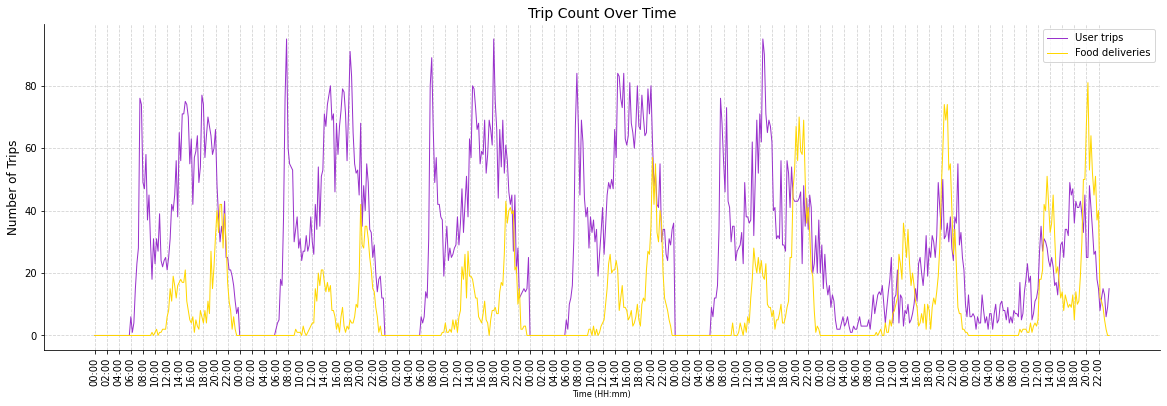

In [14]:
# Create a plot
plt.figure(figsize=(20, 6))
plt.plot(df_counts_user['x_datetime'], df_counts_user['count'], linewidth=1, color='darkorchid')
plt.plot(df_counts_food['x_datetime'], df_counts_food['count'], linewidth=1, color='gold')


# Extract the last 8 digits of x_datetime for tick labels
tick_labels = [label[-8:-3] for label in df_counts_user['x_datetime'][::8]]

# Set the x-axis tick labels and rotation
plt.xticks(df_counts_user['x_datetime'][::8], tick_labels, rotation=90)


# Set the axis labels and title
plt.xlabel('Time (HH:mm)', fontsize=8)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Trip Count Over Time', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Add a legend if needed
plt.legend(['User trips','Food deliveries'], loc='best')

# Adjust the layout for better spacing
#plt.tight_layout()

# Display the plot
plt.show()

In [15]:
# Merge the two DataFrames based on the 'timestamp' column
merged_df = pd.merge(df_counts_food, df_counts_user, on='x_datetime', suffixes=('_df1', '_df2'))

# Calculate the sum of 'count' from both DataFrames
merged_df['total_count'] = merged_df['count_df1'] + merged_df['count_df2']

print(merged_df)

     day_df1   start_time_ed_df1   x_datetime  count_df1  day_df2  \
0          1 2023-10-17 00:00:00  1, 00:00:00        0.0        1   
1          1 2023-10-17 00:15:00  1, 00:15:00        0.0        1   
2          1 2023-10-17 00:30:00  1, 00:30:00        0.0        1   
3          1 2023-10-17 00:45:00  1, 00:45:00        0.0        1   
4          1 2023-10-17 01:00:00  1, 01:00:00        0.0        1   
..       ...                 ...          ...        ...      ...   
667        7 2023-10-17 22:45:00  7, 22:45:00        9.0        7   
668        7 2023-10-17 23:00:00  7, 23:00:00        5.0        7   
669        7 2023-10-17 23:15:00  7, 23:15:00        2.0        7   
670        7 2023-10-17 23:30:00  7, 23:30:00        0.0        7   
671        7 2023-10-17 23:45:00  7, 23:45:00        0.0        7   

      start_time_ed_df2  count_df2  total_count  
0   2023-10-17 00:00:00        0.0          0.0  
1   2023-10-17 00:15:00        0.0          0.0  
2   2023-10-17 00:30:

In [16]:
max_concurrent = merged_df['total_count'].max()
print(max_concurrent)



119.0


In [17]:
time_max_concurrent = merged_df.loc[merged_df['total_count']==max_concurrent]
print(time_max_concurrent)

     day_df1   start_time_ed_df1   x_datetime  count_df1  day_df2  \
369        4 2023-10-17 20:15:00  4, 20:15:00       57.0        4   

      start_time_ed_df2  count_df2  total_count  
369 2023-10-17 20:15:00       62.0        119.0  


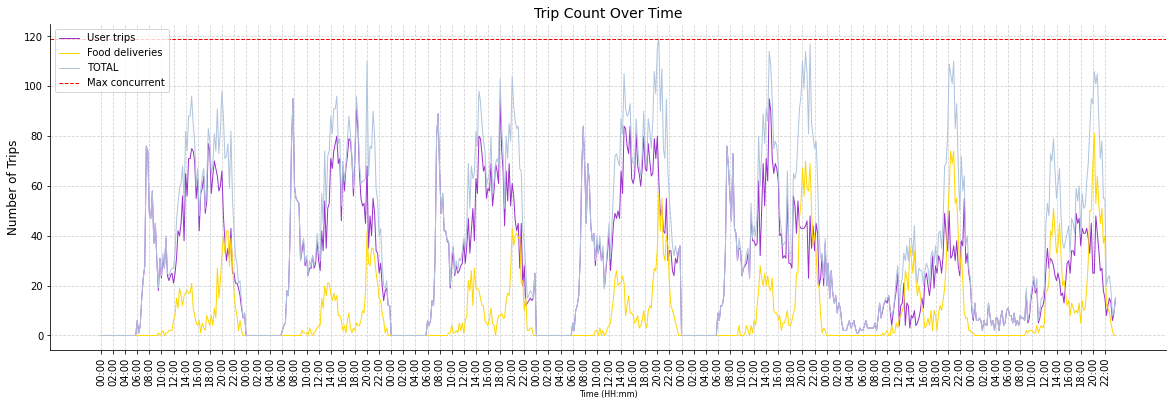

In [18]:
# Create a plot
plt.figure(figsize=(20, 6))
plt.plot(df_counts_user['x_datetime'], df_counts_user['count'], linewidth=1, color='darkorchid')
plt.plot(df_counts_food['x_datetime'], df_counts_food['count'], linewidth=1, color='gold')
#plt.plot(df_counts_food['x_datetime'], df_counts_user['count']+df_counts_food['count'], linewidth=1, color='lightsteelblue')
plt.plot(merged_df['x_datetime'], merged_df['total_count'], linewidth=1, color='lightsteelblue')
plt.axhline(y=max_concurrent, color='red', linewidth=1, linestyle='--')  # Add the horizontal red line

# Extract the last 8 digits of x_datetime for tick labels
tick_labels = [label[-8:-3] for label in df_counts_user['x_datetime'][::8]]

# Set the x-axis tick labels and rotation
plt.xticks(df_counts_user['x_datetime'][::8], tick_labels, rotation=90)


# Set the axis labels and title
plt.xlabel('Time (HH:mm)', fontsize=8)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Trip Count Over Time', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Add a legend if needed
plt.legend(['User trips','Food deliveries', 'TOTAL', 'Max concurrent'], loc='best')

# Adjust the layout for better spacing
#plt.tight_layout()

# Display the plot
plt.show()

In [19]:
max_food = df_counts_food['count'].max()
print(max_food)

81.0


In [20]:
time_max_concurrent_food = df_counts_food.loc[df_counts_food['count']==max_food]
print(time_max_concurrent_food)

     day       start_time_ed   x_datetime  count
657    7 2023-10-17 20:15:00  7, 20:15:00   81.0


In [21]:
max_user= df_counts_user['count'].max()
print(max_user)

95.0


In [47]:
time_max_concurrent_user= df_counts_user.loc[df_counts_user['count']==max_user]
print(time_max_concurrent_user)

     day       start_time_ed   x_datetime  count
225    3 2023-08-07 08:15:00  3, 08:15:00   86.0


In [22]:
max_sum= max_user + max_food
print(max_sum)

176.0


In [23]:
#Theoretical max saving
pct_improve = (max_concurrent-max_sum)/max_sum *100
print("{:.2f}".format(pct_improve))

-32.39


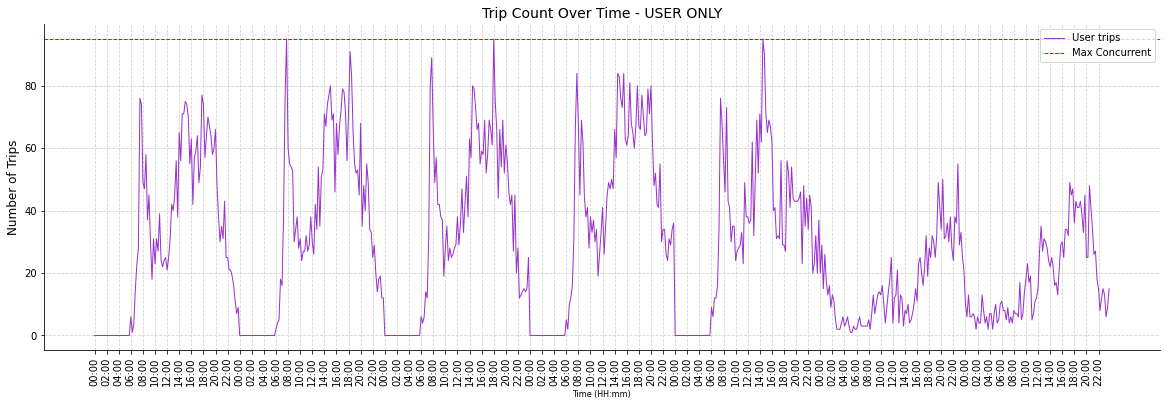

In [24]:
# Create a plot
plt.figure(figsize=(20, 6))
plt.plot(df_counts_user['x_datetime'], df_counts_user['count'], linewidth=1, color='darkorchid')
#plt.plot(df_counts_food['x_datetime'], df_counts_food['count'], linewidth=1, color='gold')
plt.axhline(y=max_user, color='red', linewidth=1, linestyle='--')  # Add the horizontal red line

# Extract the last 8 digits of x_datetime for tick labels
tick_labels = [label[-8:-3] for label in df_counts_user['x_datetime'][::8]]

# Set the x-axis tick labels and rotation
plt.xticks(df_counts_user['x_datetime'][::8], tick_labels, rotation=90)


# Set the axis labels and title
plt.xlabel('Time (HH:mm)', fontsize=8)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Trip Count Over Time - USER ONLY', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Add a legend if needed
plt.legend(['User trips','Max Concurrent'], loc='best')

# Adjust the layout for better spacing
#plt.tight_layout()

# Display the plot
plt.show()

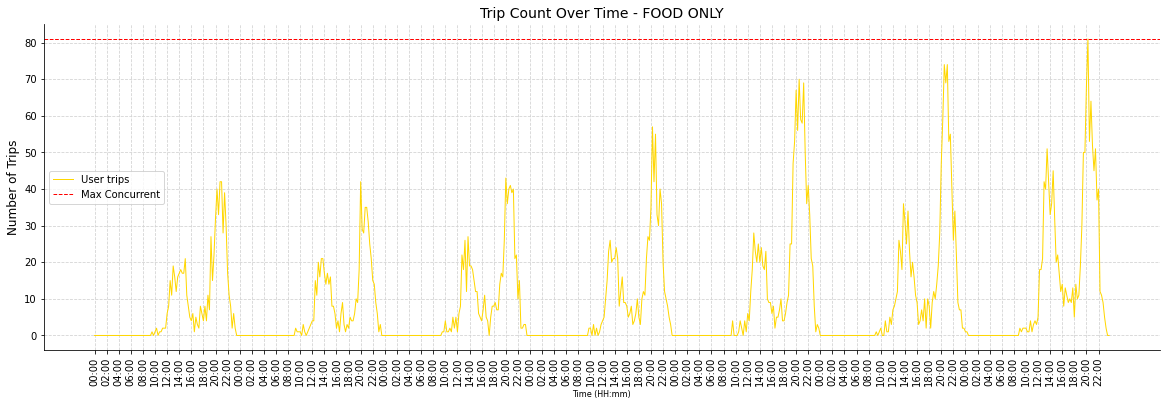

In [25]:
# Create a plot
plt.figure(figsize=(20, 6))
#plt.plot(df_counts_user['x_datetime'], df_counts_user['count'], linewidth=1, color='darkorchid')
plt.plot(df_counts_food['x_datetime'], df_counts_food['count'], linewidth=1, color='gold')
plt.axhline(y=max_food, color='red', linewidth=1, linestyle='--')  # Add the horizontal red line

# Extract the last 8 digits of x_datetime for tick labels
tick_labels = [label[-8:-3] for label in df_counts_user['x_datetime'][::8]]

# Set the x-axis tick labels and rotation
plt.xticks(df_counts_user['x_datetime'][::8], tick_labels, rotation=90)


# Set the axis labels and title
plt.xlabel('Time (HH:mm)', fontsize=8)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Trip Count Over Time - FOOD ONLY', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Add a legend if needed
plt.legend(['User trips','Max Concurrent'], loc='best')

# Adjust the layout for better spacing
#plt.tight_layout()

# Display the plot
plt.show()

In [11]:
# Extract the day from the 'starttime' column
#df_user['day'] = pd.to_datetime(df_user['starttime']).dt.day
#df_user['day'] = df_user['day'] - 6

#df_food['start_time'] = pd.to_datetime(df_food['start_time'])
##df_user['start_time_ed'] = pd.to_datetime(df_user['starttime'])

# Remove fractional seconds from 'start_time_ed' column
##df_user['start_time_ed'] = df_user['start_time_ed'].dt.floor('s')

# Group the data by day and 15-minute intervals and count the number of rows
#counts_food = df_food.groupby(['day', pd.Grouper(key='start_time', freq='15Min')]).size().reset_index(name='count')
#counts_user = df_user.groupby(['day', pd.Grouper(key='start_time_ed', freq='15Min')]).size().reset_index(name='count')


#counts_food['x_time'] = counts_food['start_time'].dt.strftime('%H:%M:%S')
#counts_user['x_time'] = counts_user['start_time_ed'].dt.strftime('%H:%M:%S')


# Combine day and x_time columns into a single datetime column
#counts_user['x_datetime'] = counts_user['day'].astype(str) + ', ' + counts_user['x_time']
#counts_food['x_datetime'] = counts_food['day'].astype(str) + ', ' + counts_food['x_time']


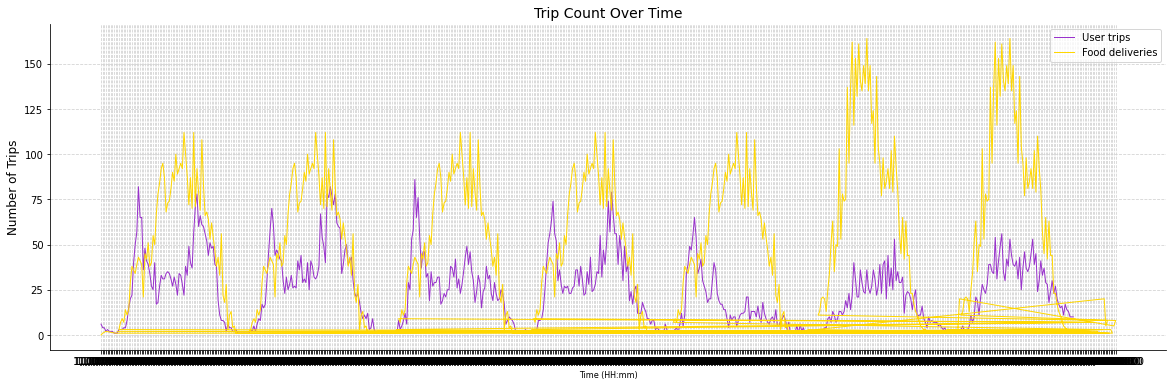

In [12]:
# Extract the day from the 'starttime' column
df_user['day'] = pd.to_datetime(df_user['starttime']).dt.day
df_user['day'] = df_user['day'] - 6

df_food['start_time'] = pd.to_datetime(df_food['start_time'])
df_user['start_time_ed'] = pd.to_datetime(df_user['starttime'])

# Remove fractional seconds from 'start_time_ed' column
df_user['start_time_ed'] = df_user['start_time_ed'].dt.floor('s')

# Group the data by day and 15-minute intervals and count the number of rows
counts_food = df_food.groupby(['day', pd.Grouper(key='start_time', freq='15Min')]).size().reset_index(name='count')
counts_user = df_user.groupby(['day', pd.Grouper(key='start_time_ed', freq='15Min')]).size().reset_index(name='count')


counts_food['x_time'] = counts_food['start_time'].dt.strftime('%H:%M:%S')
counts_user['x_time'] = counts_user['start_time_ed'].dt.strftime('%H:%M:%S')


# Combine day and x_time columns into a single datetime column
counts_user['x_datetime'] = counts_user['day'].astype(str) + ', ' + counts_user['x_time']
counts_food['x_datetime'] = counts_food['day'].astype(str) + ', ' + counts_food['x_time']

# Add a new row with 0 count at 0:00
new_row = pd.DataFrame({'x_datetime': ['1, 00:00:00'], 'count': [0]})
counts_food = pd.concat([new_row, counts_food], ignore_index=True)

# Remove duplicates and inconsistencies from counts_food DataFrame
#counts_food = counts_food.drop_duplicates(subset=['x_datetime'])
#counts_food = counts_food.sort_values('x_datetime')

# Create a plot
plt.figure(figsize=(20, 6))
plt.plot(counts_user['x_datetime'], counts_user['count'], linewidth=1, color='darkorchid')
plt.plot(counts_food['x_datetime'], counts_food['count'], linewidth=1, color='gold')

# Set the axis labels and title
plt.xlabel('Time (HH:mm)', fontsize=8)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Trip Count Over Time', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Add a legend if needed
plt.legend(['User trips','Food deliveries'], loc='best')

# Adjust the layout for better spacing
#plt.tight_layout()

# Display the plot
plt.show()